# 🤖 Clasificación con Random Forest (Cáncer de Mama)

Usaremos el dataset de cáncer de mama de sklearn para entrenar un modelo Random Forest y analizar sus métricas.

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## 📥 Carga de datos

El dataset load_breast_cancer() de sklearn.datasets es muy usado en problemas de clasificación binaria, y viene con 30 atributos numéricos que describen características de células obtenidas de imágenes de masas mamarias.

In [5]:
# Cargar dataset de sklearn
data = load_breast_cancer()

In [17]:
#print(data.DESCR)

<h3>Descripción de atributos del dataset de cáncer de mama</h3>
<table>
<thead>
<tr>
<th>Grupo</th>
<th>Atributo base</th>
<th>Descripción</th>
<th>Medidas derivadas</th>
</tr>
</thead>
<tbody>
<tr><td>Tamaño y forma</td><td>radius</td><td>Distancia del centro al borde del tumor</td><td>radius_mean, radius_se, radius_worst</td></tr>
<tr><td>Tamaño y forma</td><td>perimeter</td><td>Perímetro de la masa tumoral</td><td>perimeter_mean, perimeter_se, perimeter_worst</td></tr>
<tr><td>Tamaño y forma</td><td>area</td><td>Área de la región tumoral</td><td>area_mean, area_se, area_worst</td></tr>
<tr><td>Textura y densidad</td><td>texture</td><td>Variación en los niveles de gris (granularidad)</td><td>texture_mean, texture_se, texture_worst</td></tr>
<tr><td>Textura y densidad</td><td>smoothness</td><td>Uniformidad de bordes (baja = más irregulares)</td><td>smoothness_mean, smoothness_se, smoothness_worst</td></tr>
<tr><td>Textura y densidad</td><td>compactness</td><td>Densidad o compacidad del tumor</td><td>compactness_mean, compactness_se, compactness_worst</td></tr>
<tr><td>Bordes y complejidad</td><td>concavity</td><td>Profundidad de concavidades en los bordes</td><td>concavity_mean, concavity_se, concavity_worst</td></tr>
<tr><td>Bordes y complejidad</td><td>concave points</td><td>Cantidad de puntos cóncavos</td><td>concave points_mean, concave points_se, concave points_worst</td></tr>
<tr><td>Bordes y complejidad</td><td>symmetry</td><td>Simetría general del tumor</td><td>symmetry_mean, symmetry_se, symmetry_worst</td></tr>
<tr><td>Bordes y complejidad</td><td>fractal_dimension</td><td>Complejidad de los bordes (tipo fractal)</td><td>fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst</td></tr>
</tbody>
</table>



In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df["target"] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


Esta función de scikit-learn divide los datos en 4 partes:

* X_train: variables independientes (features) para entrenar
* X_test: variables independientes para evaluar
* y_train: etiquetas (target) para entrenar
* y_test: etiquetas para evaluar

| Parámetro         | Qué hace                                                                                                                   |
| ----------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `X, y`            | Los datos que quieres dividir. `X` son los features, `y` es la columna objetivo (target)                                   |
| `test_size=0.2`   | El 20% de los datos se usan para prueba (`test`), el 80% para entrenamiento (`train`)                                      |
| `random_state=42` | Fija la "semilla aleatoria" para que la división sea siempre igual (reproducible)                                          |
| `stratify=y`      | Asegura que la **proporción de clases** en `y` se mantenga igual en ambos conjuntos (útil si tienes clases desbalanceadas) |


## 🧠 Entrenamiento del modelo

In [22]:
# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

¿Qué está haciendo?
1. model = RandomForestClassifier(random_state=42)
Crea un modelo de Random Forest, un conjunto de árboles de decisión.

Cada árbol se entrena con una muestra diferente de los datos, y las predicciones se votan (mayoría).

random_state=42 hace que los resultados sean reproducibles (sin él, cada vez el modelo entrena distinto).

💡 "Random Forest" significa que usamos muchos árboles para mejorar la estabilidad y reducir el sobreajuste.

2. model.fit(X_train, y_train)
Este es el momento en que el modelo aprende.

Usa X_train (las variables de entrada) y y_train (la etiqueta/resultado real) para ajustar los patrones.

En términos simples: el modelo mira los datos de entrenamiento y ajusta sus árboles para predecir correctamente.

## 📊 Evaluación y métricas

In [18]:
# Predicción y métricas
y_pred = model.predict(X_test)

 ¿Qué hace?
Usa el modelo ya entrenado para predecir las clases de los pacientes que están en X_test (los que el modelo nunca había visto).

El resultado (y_pred) es un array con 0 o 1 para cada caso (maligno o benigno).



In [19]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



¿Qué hace?
Compara las predicciones (y_pred) con las etiquetas reales (y_test).

Muestra varias métricas:
* Precision
* Recall
* F1-score
* Accuracy
Se muestra por clase (ej: para "maligno" y para "benigno").

**Conclusiones del reporte de clasificación**
El modelo obtuvo una accuracy general de 96%, lo que significa que acertó en 96 de cada 100 predicciones.

| Clase | ¿Qué significa? | Precision | Recall | F1-score | Soporte  |
| ----- | --------------- | --------- | ------ | -------- | -------- |
| `0`   | Tumor maligno   | 0.95      | 0.93   | 0.94     | 42 casos |
| `1`   | Tumor benigno   | 0.96      | 0.97   | 0.97     | 72 casos |

Clase 0 (malignos):
* Precision 0.95 → el 95 % de los que predijo como malignos realmente lo eran.
* Recall 0.93 → detectó el 93 % de los tumores malignos reales (se le escaparon algunos).
* F1-score 0.94 → buen equilibrio entre ambos.

Clase 1 (benignos):
* Altísima performance: 96–97 % en todas las métricas.




# **Conclusión general**
* El modelo aprendió muy bien: tiene alto rendimiento tanto en benignos como en malignos.
* Tiene una leve tendencia a equivocarse más con los malignos (menor recall en clase 0), lo que puede ser crítico en medicina.
* Si el contexto fuera clínico, tal vez convendría ajustar el modelo para priorizar aún más Recall en la clase 0 (malignos).

Matriz de confusión:


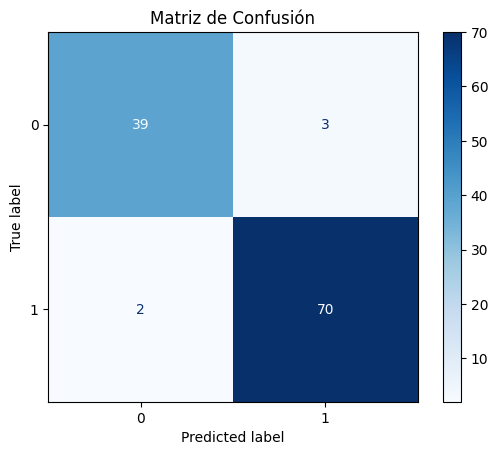

In [20]:
print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()


¿Qué hace?
Construye una matriz 2×2 que muestra cómo se distribuyen los aciertos y errores:
* TP: verdadero positivo
* FP: falso positivo
* FN: falso negativo
* TN: verdadero negativo
Lo muestra en una imagen con tonos azules (más oscuro = más casos).

|                        | Predicho = 0 | Predicho = 1 |
| ---------------------- | ------------ | ------------ |
| **Real = 0 (maligno)** | 39 (✅ TP)    | 3 (❌ FN)     |
| **Real = 1 (benigno)** | 2 (❌ FP)     | 70 (✅ TN)    |


**¿Qué nos dice esta matriz?**
1. ✅ Verdaderos positivos (39):
   - El modelo detectó correctamente 39 tumores malignos.

2. ✅ Verdaderos negativos (70):
   - Clasificó correctamente 70 tumores benignos.

3. ❌ Falsos positivos (2):
   - El modelo dijo que 2 personas tenían cáncer, pero no lo tenían.
   (Esto puede causar ansiedad y exámenes innecesarios.)

4. ❌ Falsos negativos (3):
   - El modelo no detectó 3 tumores malignos.
  (Esto es más riesgoso: son casos reales de cáncer que el modelo pasó por alto.)

# **¿Qué podemos concluir?**
El modelo funciona muy bien: solo cometió 5 errores de 114 casos.

Recall para la clase 0 (malignos) no es perfecto, pero alto.
Detectó 39 de 42 → Recall ≈ 93%

Precision para clase 0 también es alta: 39 de 41 → ≈ 95%


